<a href="https://colab.research.google.com/github/Amey2510/Test-Repo/blob/main/Binary_Classification_with_Keras_using_dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv(r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/booking_train.csv')
df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [3]:
X = df.drop(columns=['id','booking_status'])
Y = df['booking_status']

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [7]:
num_pipe = make_pipeline(SimpleImputer(strategy='median'),StandardScaler()).set_output(transform='pandas')

In [8]:
X_pre = num_pipe.fit_transform(X)
X_pre

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.151040,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-1.170469,0.409661,-2.330398,-0.214091,0.428551,5.766758,33.699120,-0.101479,-0.998052,-0.737691
1,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,0.161740,0.409661,-0.209778,1.473487,-1.149928,-0.173408,-0.060506,-0.101479,-0.870153,-0.737691
2,0.151040,-0.313454,-0.998814,-0.979466,-0.407020,-0.160945,-0.515173,2.604122,0.409661,1.557404,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.415406,-0.737691
3,-1.753925,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-0.886758,0.409661,1.557404,-1.676659,0.428551,-0.173408,-0.060506,-0.101479,-1.307702,-0.737691
4,0.151040,-0.313454,0.130259,-1.680084,-0.407020,-0.160945,-0.515173,1.901012,0.409661,0.850531,0.010919,-1.149928,-0.173408,-0.060506,-0.101479,-0.122955,-0.737691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42095,2.056005,-0.313454,-0.998814,1.122386,-0.407020,-0.160945,0.685890,0.692156,0.409661,1.557404,1.585992,0.428551,-0.173408,-0.060506,-0.101479,0.954088,1.842849
42096,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-0.862087,-2.441040,0.497095,0.798456,-1.149928,-0.173408,-0.060506,-0.101479,3.233919,-0.737691
42097,0.151040,-0.313454,-0.998814,-0.278849,2.996268,-0.160945,-0.515173,2.320411,0.409661,-0.209778,0.573445,-1.149928,-0.173408,-0.060506,-0.101479,-0.230659,-0.737691
42098,-1.753925,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-1.219810,0.409661,1.203968,-0.776617,-1.149928,-0.173408,-0.060506,-0.101479,0.415567,-0.737691


In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.8,random_state=42)

In [10]:
from keras.models import Sequential
from keras.layers import Input,Dense,Dropout

In [11]:
model = Sequential()

# Add Input Layer
model.add(Input(shape=(xtrain.shape[1],)))

# Add Hidden Layer
model.add(Dense(units=64,activation='relu'))

# Add dropout
model.add(Dropout(rate=0.4))

# Add Hidden Layer 2
model.add(Dense(units=32,activation='relu'))

# Add another dropout layer
model.add(Dropout(rate=0.2))

# Add Output Layer
model.add(Dense(units=1,activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,265 (12.75 KB)

 Trainable params: 3,265 (12.75 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
nn = model.fit(xtrain,ytrain,validation_split=0.25,epochs=20)

Epoch 1/20
790/790 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6965 - loss: 0.5737 - val_accuracy: 0.7739 - val_loss: 0.4754
Epoch 2/20
790/790 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7629 - loss: 0.4924 - val_accuracy: 0.7790 - val_loss: 0.4694
Epoch 3/20
790/790 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7690 - loss: 0.4858 - val_accuracy: 0.7822 - val_loss: 0.4656
Epoch 4/20
790/790 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7789 - loss: 0.4746 - val_accuracy: 0.7848 - val_loss: 0.4648
Epoch 5/20
790/790 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7804 - loss: 0.4716 - val_accuracy: 0.7871 - val_loss: 0.4604
Epoch 6/20
790/790 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7828 - loss: 0.4682 - val_accuracy: 0.7890 - val_loss: 0.4579
Epoch 7/20
790/790 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7865 - loss: 0.4644 - val_accuracy: 0.7886 - val_loss: 0.4566
Epoch 8/20
790/790 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7876 - loss: 0.4608 - val_accuracy: 0.

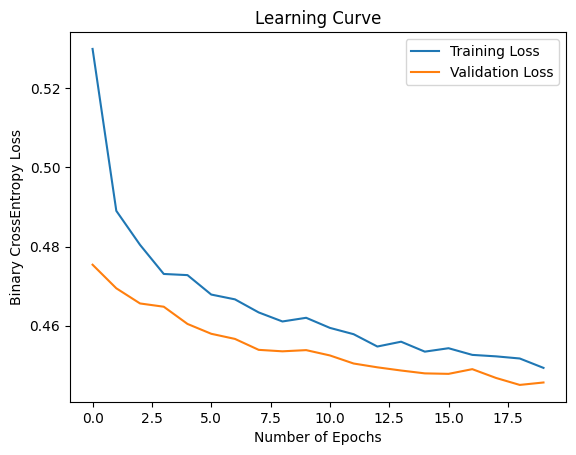

In [18]:
import matplotlib.pyplot as plt
plt.plot(nn.history['loss'],label ='Training Loss')
plt.plot(nn.history['val_loss'],label='Validation Loss')
plt.legend()
plt.title('Learning Curve')
plt.xlabel('Number of Epochs')
plt.ylabel('Binary CrossEntropy Loss')
plt.show()

In [19]:
model.evaluate(xtrain,ytrain)

1053/1053 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8036 - loss: 0.4354


[0.43654248118400574, 0.8024643659591675]

In [20]:
model.evaluate(xtest,ytest)

264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8026 - loss: 0.4398


[0.4371398389339447, 0.8021377921104431]

In [22]:
from sklearn.metrics import accuracy_score
ypred = model.predict(xtest)

264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [23]:
ypred_final = []
for i in ypred:
  if i>0.5:
    ypred_final.append(1)
  else:
    ypred_final.append(0)
# ypred result accuracy
ac_sc = accuracy_score(ytest,ypred_final)
ac_sc

0.8021377672209026

In [31]:
model.save('TrainBookings.keras')

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,797 (38.27 KB)

 Trainable params: 3,265 (12.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,532 (25.52 KB)

In [32]:
from keras.models import load_model
m = load_model('/content/TrainBookings.keras')

In [33]:
xnew = pd.read_csv(r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/booking_test.csv')
xnew.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [34]:
xnew2 = xnew.drop(columns='id')
xnew2.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [35]:
xnew_pre = num_pipe.fit_transform(xnew2)
xnew_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2.061087,-0.314961,0.126652,1.149127,-0.402773,-0.1666,0.685799,0.088181,0.408978,1.559433,-1.216381,0.435667,-0.178001,-0.060829,-0.101336,0.297557,1.853010
1,0.160920,-0.314961,-1.011996,0.436464,-0.402773,-0.1666,-0.518770,-1.008778,-2.445121,0.853184,0.574448,-1.154075,-0.178001,-0.060829,-0.101336,-0.533552,-0.745231
2,0.160920,4.156621,-1.011996,-0.988861,-0.402773,-0.1666,3.094937,-1.058079,0.408978,0.146934,-0.656747,0.435667,-0.178001,-0.060829,-0.101336,3.676312,0.553890
3,0.160920,-0.314961,-1.011996,0.436464,-0.402773,-0.1666,-0.518770,-0.195303,0.408978,-0.912440,1.581790,-1.154075,-0.178001,-0.060829,-0.101336,-0.648983,-0.745231
4,-1.739248,-0.314961,-1.011996,-0.276199,3.038115,-0.1666,-0.518770,-1.193658,0.408978,0.500059,0.574448,0.435667,-0.178001,-0.060829,-0.101336,1.068913,-0.745231


In [36]:
final_pred = m.predict(xnew2)

878/878 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [42]:
ypred_on_xtest = m.predict(xtest)
ypred_on_xtest_final = []
for i in ypred_on_xtest:
    if i > 0.5:
        ypred_on_xtest_final.append(1)
    else:
        ypred_on_xtest_final.append(0)

# Calculate accuracy of the loaded model on the original test set
loaded_model_accuracy = accuracy_score(ytest, ypred_on_xtest_final)
print(f'Accuracy of loaded model on original test set: {loaded_model_accuracy}')

264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy of loaded model on original test set: 0.8021377672209026
